<a href="https://colab.research.google.com/github/angel4sara/ICT-Assignments/blob/main/Intermediate_Assessment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Train Data

## Load the data

In [2]:
train = pd.read_csv('/content/train_LZdllcl.csv')
train

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54803,3030,Technology,region_14,Bachelor's,m,sourcing,1,48,3.0,17,0,0,78,0
54804,74592,Operations,region_27,Master's & above,f,other,1,37,2.0,6,0,0,56,0
54805,13918,Analytics,region_1,Bachelor's,m,other,1,27,5.0,3,1,0,79,0
54806,13614,Sales & Marketing,region_9,NaN,m,sourcing,1,29,1.0,2,0,0,45,0


In [3]:
train.shape

(54808, 14)

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  KPIs_met >80%         54808 non-null  int64  
 11  awards_won?           54808 non-null  int64  
 12  avg_training_score    54808 non-null  int64  
 13  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


- Categorical columns: department, region, education, gender, recruitment_channel.
- Numerical columns: no_of_trainings, age, previous_year_rating, length_of_service, KPIs_met >80%, awards_won?, avg_training_score.
- Target variable is_promoted.

In [5]:
train.isna().sum()

,0
employee_id,0
department,0
region,0
education,2409
gender,0
recruitment_channel,0
no_of_trainings,0
age,0
previous_year_rating,4124
length_of_service,0


- education	has 2409 missing values.
-previous_year_rating has 4124 missing values.

In [6]:
train.describe()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
count,54808.000000,54808.000000,54808.000000,50684.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000
mean,39195.830627,1.253011,34.803915,3.329256,5.865512,0.351974,0.023172,63.386750,0.085170
std,22586.581449,0.609264,7.660169,1.259993,4.265094,0.477590,0.150450,13.371559,0.279137
min,1.000000,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000,0.000000
25%,19669.750000,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000,0.000000
50%,39225.500000,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000,0.000000
75%,58730.500000,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000,0.000000
max,78298.000000,10.000000,60.000000,5.000000,37.000000,1.000000,1.000000,99.000000,1.000000


## Plot for target column

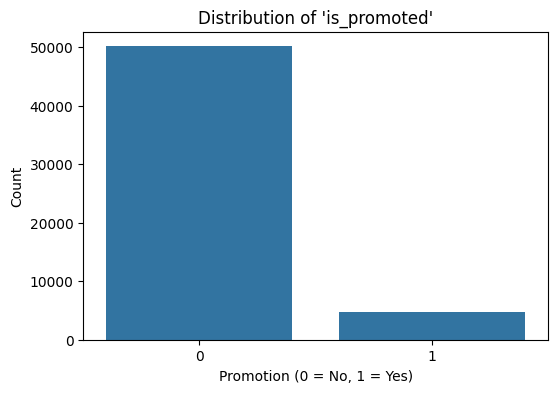

In [7]:
plt.figure(figsize=(6, 4))
sns.countplot(x=train['is_promoted'])
plt.title("Distribution of 'is_promoted'")
plt.xlabel("Promotion (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()

- Imputing the missing values
    - education with mode as its a categorical value.
    - previous_year_rating with median as its a numerical value

In [8]:
train['education'].fillna(train['education'].mode()[0], inplace=True)   #education
train['previous_year_rating'].fillna(train['previous_year_rating'].median(), inplace=True) #previous_year_rating

<ipython-input-8-01354fe05b6d>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train['education'].fillna(train['education'].mode()[0], inplace=True)   #education
<ipython-input-8-01354fe05b6d>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method

In [9]:
train.isnull().sum()

,0
employee_id,0
department,0
region,0
education,0
gender,0
recruitment_channel,0
no_of_trainings,0
age,0
previous_year_rating,0
length_of_service,0


## Encoding

In [11]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Encode categorical variables using Label Encoding
categorical_cols = ['department', 'region', 'education', 'gender', 'recruitment_channel']
label_encoders = {}

for col in categorical_cols:
    le = LabelEncoder()
    le.fit(train[col])  # Fit the encoder on the train data
    label_encoders[col] = le # Store the encoder in the dict
    train[col] = le.transform(train[col])  # Transform the train data

In [12]:
# Scale numerical features
scaler = StandardScaler()
numerical_cols = ['no_of_trainings', 'age', 'previous_year_rating', 'length_of_service', 'avg_training_score']
train[numerical_cols] = scaler.fit_transform(train[numerical_cols])

In [13]:
train.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,7,31,2,0,2,-0.415276,0.025598,1.395766,0.500460,1,0,-1.075931,0
1,65141,4,14,0,1,0,-0.415276,-0.627135,1.395766,-0.437395,0,0,-0.253282,0
2,7513,7,10,0,1,2,-0.415276,-0.104948,-0.250651,0.265996,0,0,-1.001145,0
3,2542,7,15,0,1,0,1.226063,0.547785,-1.897069,0.969387,0,0,-1.001145,0
4,48945,8,18,0,1,0,-0.415276,1.331064,-0.250651,-0.906322,0,0,0.718939,0


# Model Evaluation

## Splitting the data

In [14]:
from sklearn.model_selection import train_test_split

X = train.drop(columns=["employee_id", "is_promoted"])
y = train["is_promoted"]

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

## Random Forest Classifier

In [15]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight="balanced")
rf_model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', random_state=42)

In [16]:
from sklearn.metrics import f1_score

y_pred = rf_model.predict(X_val)
f1 = f1_score(y_val, y_pred)
print("Random Forest Classifier F1 Score:", f1)

Random Forest Classifier F1 Score: 0.4384


## Logistic Regression

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from sklearn.preprocessing import StandardScaler

# Standardize features for Logistic Regression
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

# Train Logistic Regression
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train_scaled, y_train)

# Predict and evaluate
y_pred_log = log_reg.predict(X_val_scaled)
f1_log = f1_score(y_val, y_pred_log)
print("Logistic Regression F1 Score:", f1_log)


Logistic Regression F1 Score: 0.13753581661891118


## DecisionTree #Classifier

In [18]:
from sklearn.tree import DecisionTreeClassifier

# Train Decision Tree
dt_model = DecisionTreeClassifier(max_depth=10, random_state=42)
dt_model.fit(X_train, y_train)

# Predict and evaluate
y_pred_dt = dt_model.predict(X_val)
f1_dt = f1_score(y_val, y_pred_dt)
print("Decision Tree F1 Score:", f1_dt)


Decision Tree F1 Score: 0.3866231647634584


## KNN

In [19]:
from sklearn.neighbors import KNeighborsClassifier

# Standardize features for KNN
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

# Train KNN
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train_scaled, y_train)

# Predict and evaluate
y_pred_knn = knn_model.predict(X_val_scaled)
f1_knn = f1_score(y_val, y_pred_knn)
print("KNN F1 Score:", f1_knn)


KNN F1 Score: 0.2403924775143091


The best model is the Random Forest

## XGBClassifier

In [20]:
from xgboost import XGBClassifier

# Train XGBoost model
xgb_model = XGBClassifier(n_estimators=200, learning_rate=0.05, max_depth=6, random_state=42)
xgb_model.fit(X_train, y_train)

# Predictions and evaluation for XGBoost
y_pred_xgb = xgb_model.predict(X_val)
f1_xgb = f1_score(y_val, y_pred_xgb)


In [21]:
f1_xgb

0.5098347757671126

# Prediction on Test

In [37]:
# Reload the test dataset
test_df = pd.read_csv("/content/test_2umaH9m.csv")

# Handle missing values in test dataset
test_df['education'].fillna(test_df['education'].mode()[0], inplace=True)   #education
test_df['previous_year_rating'].fillna(test_df['previous_year_rating'].median(), inplace=True) #previous_year_rating

# Encode categorical variables in test dataset
for col in categorical_cols:
    le = LabelEncoder()
    test_df[col] = le.fit_transform(test_df[col])

# Prepare test dataset (exclude employee_id)
X_test = test_df.drop(columns=["employee_id"])

# Make predictions on test dataset using the trained model
y_test_pred = rf_model.predict(X_test)



<ipython-input-37-b331853c5736>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test_df['education'].fillna(test_df['education'].mode()[0], inplace=True)   #education
<ipython-input-37-b331853c5736>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].

In [39]:
# Creating a dataframe with predictions
test_predictions_df = pd.DataFrame({"employee_id": test_df["employee_id"], "is_promoted": y_test_pred})

# Save predictions to a CSV file
test_predictions_df.to_csv("test_predictions.csv", index=False)

